In [1]:
from IPython.display import display, Markdown, Latex, Javascript
import emoji
import time
import ipywidgets as widgets
import ipython_blocking


display(Markdown('### 💠 F1 Terms Verification'))
#display(Markdown('> *' + time.ctime() +
#                 '* <br>Connect Power Meter to `Port 1` and press *Run* 💡 ![](gif/714.gif)'))

button = widgets.Button(
    description='Run',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='play'
)
button

### 💠 F1 Terms Verification

Button(button_style='success', description='Run', icon='play', style=ButtonStyle(), tooltip='Click me')

In [3]:
%blockrun button

In [ ]:
button.layout.visibility = 'hidden'
display(Markdown('> *' + time.ctime() + '* <br>🔌 Connecting to the device, please wating... ![](gif/714.gif)'))

import visa
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

class DeviceBundle(object):
    def __init__(self, name, rm, default_ip):    
        self.name = name
        self.rm = rm
        self.default_ip = default_ip
        self.inst = None
        auto_layout = widgets.Layout( width='auto', layout='align_self:center', )
        self.descr = widgets.Label(value=name, layout=auto_layout)
        self.ip = widgets.Text(
            value= default_ip,
            description = 'IP Address',
            disabled = False,
        )
        self.button = widgets.Button(
            description='Connect',
            disabled=False,
            button_style='',  # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Click me',
            icon='gear',
            layout = auto_layout
        )     
        self.p = widgets.Text(
            value='',
            placeholder='<empty>',
            description='Producer:',
            disabled=True
        )
        self.m = widgets.Text(
            value='',
            placeholder='<empty>',
            description='Model:',
            disabled=True
        )
        self.s = widgets.Text(
            value='',
            placeholder='<empty>',
            description='Serial:',
            disabled=True
        )
        self.v = widgets.Text(
            value='',
            placeholder='<empty>',
            description='Version:',
            disabled=True
        )
        self.button.on_click(self.on_connect)
        self.__box = widgets.VBox([self.descr, self.ip, self.p, self.m, self.s, self.v, self.button])
    
    def on_connect(self, b):
        addr, port = self.ip.value.split(":", 2)
        self.inst = self.rm.open_resource('TCPIP0::'+ addr + '::' + port + '::SOCKET')
        self.inst.write_termination = '\n'
        self.inst.read_termination = '\n'
        self.inst.timeout = 5000
        ans = self.inst.query("*IDN?")
        self.p.value, self.m.value, self.s.value, self.v.value = ans.split(', ', 3)
        
    def instance(self):
        return self.inst
    
    def box(self):
        return self.__box
    
rm = visa.ResourceManager('@py')

legacy = DeviceBundle('Legacy device', rm, '127.0.0.1:5024')
ng = DeviceBundle('Nextgen device', rm, '127.0.0.1:5025')

widgets.HBox([legacy.box(), ng.box()])

In [ ]:
inst1 = legacy.instance() 
print(inst1)

In [ ]:
display(Markdown('### 💠 Connect to the devices and continue'))
button2 = widgets.Button(
    description='Continue',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
button2

In [ ]:
%blockrun button2

In [ ]:
import numpy as np
import time
from tqdm import tqdm_notebook

inst = legacy.instance()
inst2 = ng.instance()

# inst.write("SYST:PRES")
# inst.write("*CLS")
# inst.write("SENS:FREQ:STAR 1 MHz")
# inst.write("SENS:CORR:CLE")
# inst.write("SENS:CORR:COLL:CLE")
## inst.write("TRIG:SOUR INT")
## inst.write("TRIG:SOUR BUS")
## inst.query("TRIG:SOUR?")

#inst.write("SENS:CORR:TRIG:FREE ON")
#inst.query("SENS:CORR:TRIG:FREE?")
#inst.query("SYST:ERR?")

In [ ]:
# inst.write("SENS:CORR:COLL:METH:SOLT1 1")
# inst.query("SYST:ERR?")


# values = inst.query_ascii_values('CURV?', container=numpy.array)
# for i in tqdm_notebook(range(100)):
#     inst.write("TRIG:SING")
#     inst.query("*OPC?")
#     RawData = inst.query_ascii_values('SENSe1:DATA:RAWData? S11', container=np.array, converter='e')
#     ComplexRawData = RawData.astype(np.float32).view(np.complex64)
#     plt.plot(ComplexRawData.real,ComplexRawData.imag, '-')
#     CorrectedData = inst.query_ascii_values('SENSe1:DATA:CORRData? S11', container=np.array, converter='e')
#     ComplexCorrectedData = CorrectedData.astype(np.float32).view(np.complex64)
#     plt.plot(ComplexCorrectedData.real,ComplexCorrectedData.imag, '-')
#     #time.sleep(0.1)

In [ ]:
print(inst)
print(inst2)

KeyboardInterrupt: 

In [ ]:
load_r.show()

In [ ]:
# read data from file
load_r = np.loadtxt('LoadA_5M_RI.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
open_r = np.loadtxt('OpenA_5M_RI.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)
short_r = np.loadtxt('ShortA_5M_RI.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})#.view(np.complex64)

fig3, axs3 = plt.subplots(1, 3)
axs3[0].plot(load_r.real,load_r.imag, '-')
axs3[0].set_aspect('equal')
axs3[0].set_title('load from file', fontsize=10)
axs3[1].plot(open_r.real,open_r.imag, '-')
axs3[1].set_aspect('equal', 'box')
axs3[1].set_title('open from file', fontsize=10)
axs3[2].plot(short_r.real,short_r.imag, '-')
axs3[2].set_aspect('equal', 'box')
axs3[2].set_title('short from file', fontsize=10)

fig3.tight_layout()

plt.show()

In [ ]:
display(Markdown('### 💠 F1 Terms Verification'))
#display(Markdown('> *' + time.ctime() +
#                 '* <br>Connect Power Meter to `Port 1` and press *Run* 💡 ![](gif/714.gif)'))

port_wgt = widgets.Dropdown(options=['1', '2'], description='Port')
button_wgt = widgets.Button(
    description='Continue',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='play'
)
box = widgets.VBox(children=[port_wgt, button_wgt])
box

In [ ]:
%blockrun button_wgt

In [ ]:
cal_port = port_wgt.value

In [ ]:


inst.write("SENS:FREQ:STAR 5 MHz")
inst.write("SENS:FREQ:STOP 9 GHz")
inst.write("SENS:CORR:COLL:METH:SOLT1 " + cal_port)

inst2.write("SENS:FREQ:STAR 5 MHz")
inst2.write("SENS:FREQ:STOP 9 GHz")
inst.write('SENSe:SWEep:POINts 1557')
inst2.write('SENSe:SWEep:POINts 1557')
inst.write('SENSe:BWIDth 10000')
inst2.write('SENSe:BWIDth 10000')
inst2.write("SENS:CORR:COLL:METH:SOLT1 " + cal_port)
print(inst2.query("SYST:ERR?"))

display(Markdown('### 💠 Stimulus configured press to continue'))
button3 = widgets.Button(
    description='Continue',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='gear'
)
button3

In [ ]:
%blockrun button3

KeyboardInterrupt: 

In [ ]:
# inst2.write('SENS1:CORR:COLL:open 1')
# inst2.write('SENS1:CORR:COLL:load 1')
# inst2.write('SENS1:CORR:COLL:short 1')
# inst2.write("SENS:CORR:COLL:METH:SOLT1 1")
# inst2.write("SENS:CORR:COLL:SAVE")

In [12]:
# загрузить данные мер в приложение и применить калибровку 
def push_to_device(inst, port, open_data, short_data, load_data):
#     inst.write("SENS:CORR:COLL:METH:SOLT1 1")
#     inst.query("SYST:ERR?")
    inst.write_ascii_values('SENS:CORR:COLL:DATA:LOAD ' + port + ',', load_data.view(np.float64).tolist(), converter='e')
    #inst2.query("*OPC?")
    print(inst.query("SYST:ERR?"))

    inst.write_ascii_values('SENS:CORR:COLL:DATA:OPEN ' + port + ',', open_data.view(np.float64).tolist(), converter='e')
    #inst2.query("*OPC?")
    print(inst.query("SYST:ERR?"))

    inst.write_ascii_values('SENS:CORR:COLL:DATA:SHOR ' + port + ',', short_data.view(np.float64).tolist(), converter='e')
    #inst2.query("*OPC?")
    print(inst.query("SYST:ERR?"))
    inst.write("SENS:CORR:COLL:METH:SOLT1 " + port)
    # применить калибровку
    

push_to_device(inst, cal_port, open_r, short_r, load_r)

0, No error
0, No error
0, No error


In [13]:
push_to_device(inst2, cal_port, open_r, short_r, load_r)

0,"No error"
0,"No error"
0,"No error"


In [14]:
inst.write("SENS:CORR:COLL:SAVE")
print(inst.query("SYST:ERR?"))
inst2.write("SENS:CORR:COLL:SAVE")
print(inst2.query("SYST:ERR?"))

0, No error
0,"No error"


In [15]:
# применить калибровку и построить графики термов
def pull_terms(inst, port):
    er = inst.query_ascii_values('SENS:CORR:COEF? ER,' +  port + ',' + port, container=np.array, converter='e')
    complex_er = er.astype(np.float32).view(np.complex64)

    ed = inst.query_ascii_values('SENS:CORR:COEF? ED,' +  port + ',' + port, container=np.array, converter='e')
    complex_ed = ed.astype(np.float32).view(np.complex64)

    es = inst.query_ascii_values('SENS:CORR:COEF? ES,' +  port + ',' + port, container=np.array, converter='e')
    complex_es = es.astype(np.float32).view(np.complex64)
    return complex_er, complex_ed, complex_es

er, ed, es = pull_terms(inst, cal_port)
er2, ed2, es2 = pull_terms(inst2, cal_port)

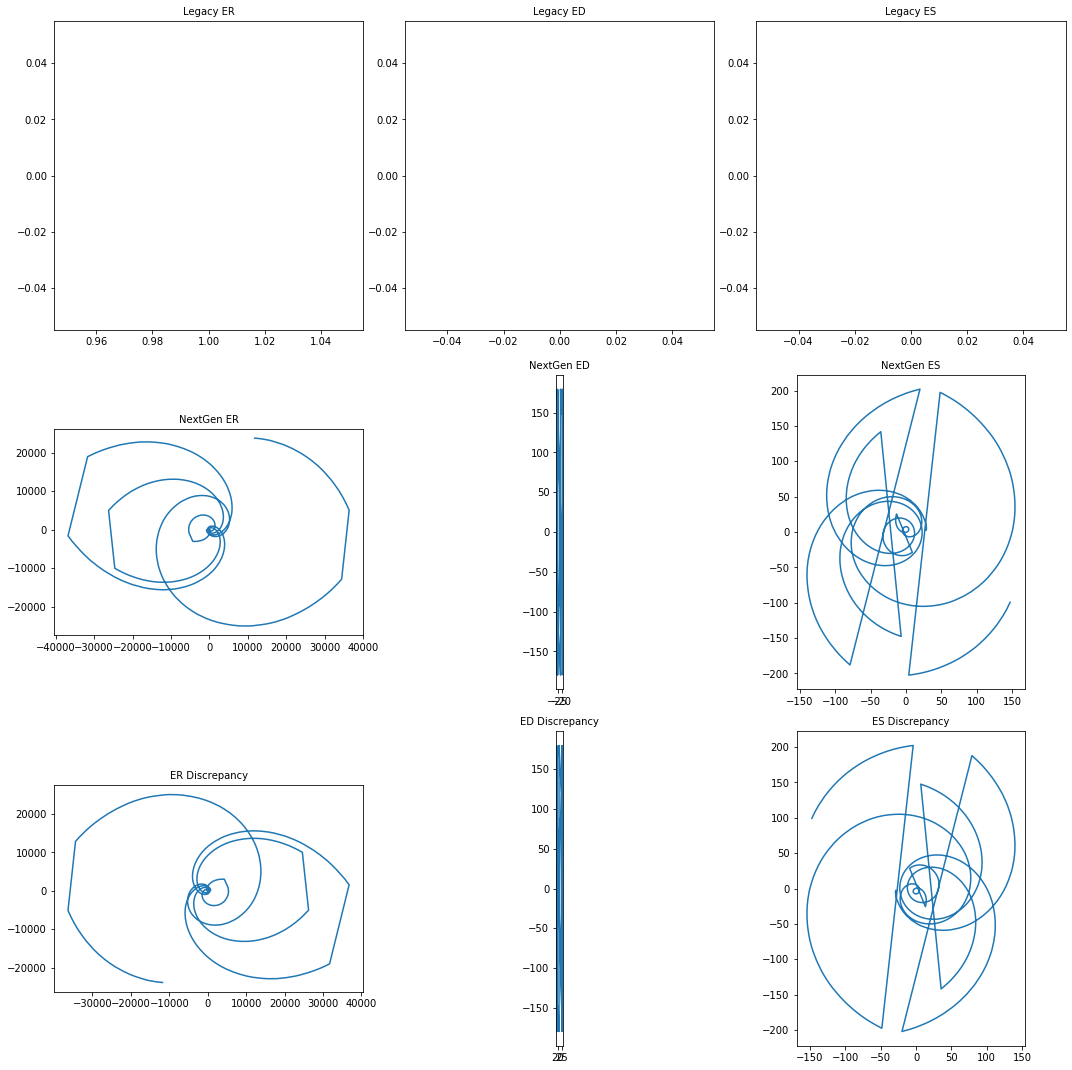

In [16]:
d_er = er - er2
d_ed = ed - ed2
d_es = es - es2

# # create array of all unique x values
# x_all = er.real + er2.real
# x_all = np.unique(np.array(x_all))

# # interpolate y values on new xarray
# y_all = np.empty((len(x_all), 2))
# for i,x,y in zip(range(2), [er.real,er2.real], [er.imag, er2.imag]):
#     y_all[:,i] = np.interp(x_all, x, y)

# # find out min and max values    
# ymin = y_all.min(axis=1)
# ymax = y_all.max(axis=1)


fig4, axs4 = plt.subplots(3, 3, figsize=(15,15))

#axs4[0,0].plot(er2.real,er2.imag, '-')
axs4[0,0].set_aspect('equal')
axs4[0,0].set_title('Legacy ER', fontsize=10)
axs4[0,0].plot(er.real,er.imag, '-')
#axs4[0,0].fill_between(x_all, ymin, ymax, alpha=0.6)axs4[1,0].plot(er2.real,er2.imag, '-')

axs4[1,0].set_aspect('equal')
axs4[1,0].set_title('NextGen ER', fontsize=10)
axs4[1,0].plot(er2.real,er2.imag, '-')

axs4[0,1].set_aspect('equal', 'box')
axs4[0,1].set_title('Legacy ED', fontsize=10)
axs4[0,1].plot(ed.real,ed.imag, '-')

axs4[1,1].set_aspect('equal', 'box')
axs4[1,1].set_title('NextGen ED', fontsize=10)
axs4[1,1].plot(ed2.real,ed2.imag, '-')

axs4[0,2].set_aspect('equal', 'box')
axs4[0,2].set_title('Legacy ES', fontsize=10)
axs4[0,2].plot(es.real,es.imag, '-')

axs4[1,2].set_aspect('equal', 'box')
axs4[1,2].set_title('NextGen ES', fontsize=10)
axs4[1,2].plot(es2.real, es2.imag, '-')

axs4[2,0].set_aspect('equal')
axs4[2,0].set_title('ER Discrepancy', fontsize=10)
axs4[2,0].plot(d_er.real, d_er.imag, '-')

axs4[2,1].set_aspect('equal', 'box')
axs4[2,1].set_title('ED Discrepancy', fontsize=10)
axs4[2,1].plot(d_ed.real, d_ed.imag, '-')

axs4[2,2].set_aspect('equal', 'box')
axs4[2,2].set_title('ES Discrepancy', fontsize=10)
axs4[2,2].plot(d_es.real, d_es.imag, '-')

fig4.tight_layout()

plt.show()

In [27]:
with open('ER2.txt', 'w') as file:    
    for i in er2:
        file.write(f'{str(i)} \n')